# Imports

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Beispiel 1: Deadline-Simulation
Wir haben 9 Stunden Zeit um zwei Aufgaben zu erledigen.
Eine dauert 1-5 Stunden und die andere 2-6.
Wie lange wird es uns wahrscheinlich brauchen um diese Aufgaben zu machen,
und wie wahrscheinlich ist es, das wir diese Aufgaben rechtzeitig schaffen?

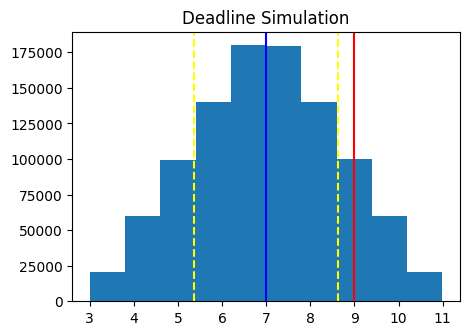

Wahrscheinlichkeit das wir es Zeitlich schaffen:
87.5428%
Mittelwert: 
 6.9982690129643546
Standardabweichung: 
 1.631798259954826 

Maximale Zeit:
10.988966632914877
Minimale Zeit:
3.0070311162695647



In [29]:
def deadline_sim(n):

    deadline = 9

    # Zwei Aufgaben
    task1 = np.random.uniform(1, 5, n)
    task2 = np.random.uniform(2, 6, n)
    durations = task1 + task2

    # Kenngrößen + P(X<9)
    mean = np.average(durations)
    standard_deviation = np.std(durations)
    probability = ((durations<9).sum())/n
    maximum = np.max(durations)
    minimum = np.min(durations)

    #Visualisierung
    plt.figure(figsize=(5, 3.5))
    plt.hist(durations)
    plt.title('Deadline Simulation')
    plt.axvline(mean, color='blue')
    plt.axvline(mean + standard_deviation, color='yellow', linestyle='--')
    plt.axvline(mean - standard_deviation, color='yellow', linestyle='--')
    plt.axvline(deadline, color='red')
    plt.show()

    # Infos
    print("Wahrscheinlichkeit das wir es Zeitlich schaffen:", "\n", probability*100, "%", sep="")
    print("Mittelwert:", "\n", mean)
    print("Standardabweichung:", "\n", standard_deviation, "\n")
    print("Maximale Zeit:", "\n", maximum,"\n", "Minimale Zeit:", "\n", minimum, "\n", sep="")

deadline_sim(1000000)

# Beispiel 2: Pi-Schätzung
Wir wollen pi mit einer visuellen Simulation berechnen.
Die Simulation hat ein Quadrat mit der Seitenlängen $\frac{1}{2}{a}$,
welches ein Viertelkreis mit dem Radius $\frac{1}{2}{a}$ beinhaltet.
Jetzt suchen wir uns zufällige x- und y-koordinaten aus und markieren sie mit einem Punkt.
Danach teilen wir die Punkte im Kreis und multiplizieren es mit 4.

$$\frac{A_K}{A_Q}=\frac{\pi*r^2}{a^2}$$
$$=\frac{\pi*1^2}{1^{2}}$$
$$=\frac{\pi *\cancel{1^2}}{\cancel{1^{2}}}=\pi$$


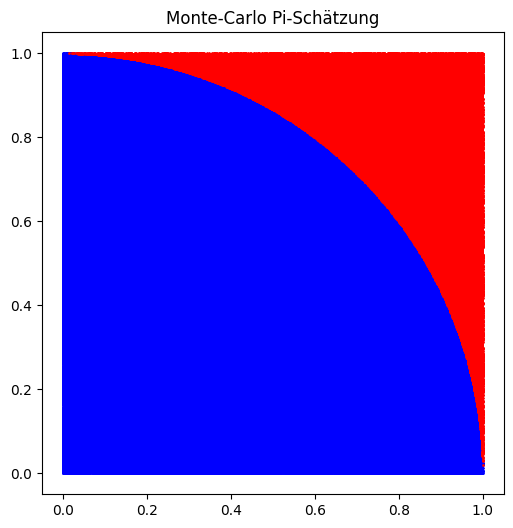

Geschätztes Pi: 3.1420


np.float64(3.142016)

In [99]:
def estimate_pi(n):
    # x und y
    x = np.random.rand(n)
    y = np.random.rand(n)

    # Markieren
    inside = x**2 + y**2 <= 1

    plt.figure(figsize=(6, 6))
    plt.scatter(x[inside], y[inside], s=1, color='blue')
    plt.scatter(x[~inside], y[~inside], s=1, color='red')
    plt.title('Monte-Carlo Pi-Schätzung')
    plt.axis('square')
    plt.show()

    pi_est = (np.sum(inside) / n) * 4
    print(f"Geschätztes Pi: {pi_est:.4f}")
    return pi_est

estimate_pi(1000000)

# Beispiel 3: Monty-Hall-Problem
In diesem Abschnitt modellieren wir das Monty-Hall-Problem, auch Ziegenproblem genannt.

In [100]:
def monty_hall(n):
    stay_wins = 0
    switch_wins = 0

    for i in range(n):
        car = np.random.randint(3)
        choice = np.random.randint(3)

        if choice == car:
            stay_wins += 1
        else:
            switch_wins += 1

    print(f"Gewinnrate (Bleiben): {stay_wins/n:.2%}")
    print(f"Gewinnrate (Wechseln): {switch_wins/n:.2%}")
    return stay_wins, switch_wins

monty_hall(1000000)

Gewinnrate (Bleiben): 33.45%
Gewinnrate (Wechseln): 66.55%


(334479, 665521)

# Beispiel 4: Aktienmarkt
Wir tun Aktien im Wert von 100€ Kaufen, und
unsere tägliche Rendite beträgt 0.1% und die Volatilität 2%.
Machen wir nach 1. Jahr gewinn?

Wir Benutzen die Formel $$P_t = P_{t-1} \times e^{r_t}$$

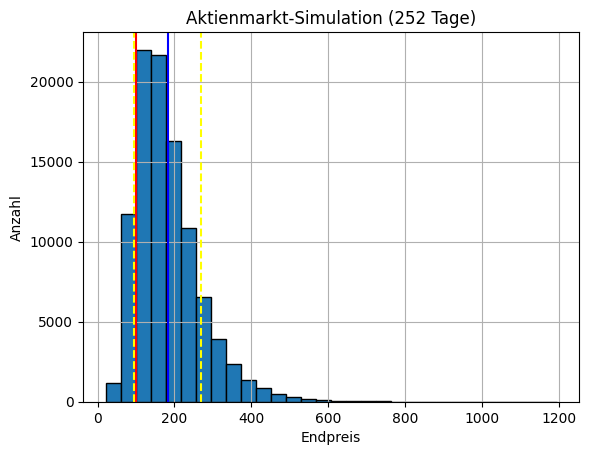

Wahrscheinlichkeit für Gewinn: 86.803%
Mittelwert: 182.45122396781295
Modalwert: ModeResult(mode=np.float64(120.0), count=np.int64(622))
Standardabweichung: 86.55123412504288 

Maximaler Gewinn: 
 1193.1642157507868
Maximaler Verlust: 
 21.26399419197997


In [96]:
# noinspection SpellCheckingInspection
def cumulativesum(cumulative_sum):
    cumsum = np.cumsum(cumulative_sum)
    return cumsum

def market_sim(capital, days, simulations, mu, sigma):
    end_prices = []
    for i in range(simulations):
        returns = np.random.normal(loc=mu, scale=sigma, size=days)
        price = capital * np.exp(cumulativesum(returns))
        end_prices.append(price[-1])

    end_prices = np.array(end_prices)
    # Kenngrößen + P(X>100)
    probability_of_returns = (end_prices>capital).sum()/simulations
    probability_of_losses = (end_prices<capital).sum()/simulations
    mean = np.mean(end_prices)
    standard_deviation = np.std(end_prices)
    max_price = np.max(end_prices)
    min_price = np.min(end_prices)
    mode = stats.mode(end_prices.round())


    counts, bins, patches = plt.hist(end_prices, bins=30, edgecolor='black')
    plt.axvline(100, color='red')
    plt.axvline(mean, color='blue')
    plt.axvline(mean + standard_deviation, color='yellow', linestyle='--')
    plt.axvline(mean - standard_deviation, color='yellow', linestyle='--')
    plt.title('Aktienmarkt-Simulation (252 Tage)')
    plt.xlabel('Endpreis')
    plt.ylabel('Anzahl')
    plt.grid()
    plt.show()

    # Infos
    print("Wahrscheinlichkeit für Gewinn: ", probability_of_returns*100, "%", sep="")
    print("Mittelwert:", mean)
    print("Modalwert:", mode)
    print("Standardabweichung:", standard_deviation, "\n")
    print("Maximaler Gewinn:", "\n", max_price)
    print("Maximaler Verlust:", "\n", min_price)




market_sim(100, 500, simulations=100000, mu=0.001, sigma=0.02)

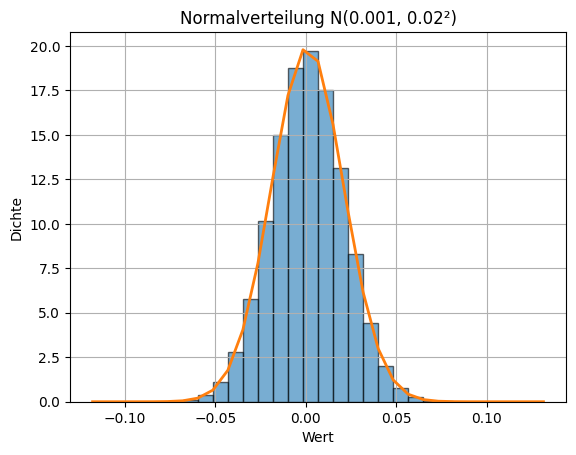

In [94]:
def plot_normal(mu, sigma, size):
    """Generiert und plottet eine Normalverteilung mit gegebenem Mittelwert und Standardabweichung."""
    data = np.random.normal(loc=mu, scale=sigma, size=size)
    # Histogramm
    count, bins, _ = plt.hist(data, bins=30, density=True, alpha=0.6, edgecolor='black')
    # Dichtefunktion
    pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- (bins - mu)**2 / (2 * sigma**2))
    plt.plot(bins, pdf, linewidth=2)
    plt.title(f'Normalverteilung N({mu}, {sigma}²)')
    plt.xlabel('Wert')
    plt.ylabel('Dichte')
    plt.grid()
    plt.show()

plot_normal(0.001, 0.02, 1000000000)

# Beispiel 5: Wartezeiten Simulation
Es gibt viele verschiedene situationen wo dies in der Wissenschaft zutrifft,
wie zum Beispiel beim Radioaktiven zerfall, aber auch bei alltagsproblemen wie Buszeiten.

uranium-218: 6*10^-3

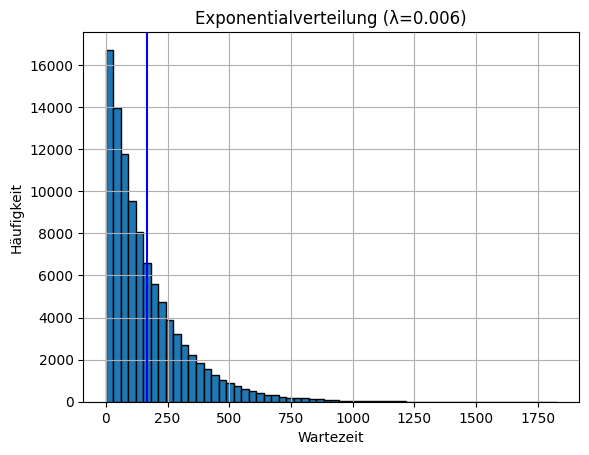

Mittelwert: 166.09844337803898


In [69]:
import numpy as np
import matplotlib.pyplot as plt

def exp_sim(lambda_, n):
    U = np.random.rand(n)
    data = -np.log(U) / lambda_

    mean = np.mean(data)

    plt.hist(data, bins=60, edgecolor='black')
    plt.title(f'Exponentialverteilung (λ={lambda_})')
    plt.xlabel('Wartezeit')
    plt.ylabel('Häufigkeit')
    plt.axvline(mean, color='blue')
    plt.grid()
    plt.show()

    # Infos
    print("Mittelwert:", mean)

#exp_sim(0.5, 1000)
exp_sim(6*10**-3, 100000)